In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



In [6]:
df = pd.read_csv('metrics_calculated.csv')

In [7]:
# Extract the accuracy value from the label column
df['accuracy'] = df['label'].str.extract(r'accuracy-(\d+)', expand=False).fillna(0).astype(int)
df['neighbor'] = df['label'].str.extract(r'N(\d+)', expand=False).fillna(0).astype(int)
df['user_type'] = df['label'].str.split('-').str[-1]
df['user_type'] = df['user_type'].map({'location': 'location', 'id': 'id', 'type': 'type'}).fillna('mix')
df['caching_mode'] = df['label'].str.split('-').str[3]
df['caching_mode'] = df['caching_mode'].map({'standard': 'standard', 'cooperative': 'cooperative'}).fillna('')

df.to_csv('out.csv', index=False)


In [ ]:
data = df
# Filter out rows with mode equal to 'cooperative'
data = data[data['caching_mode'] != 'cooperative']

# Define the accuracy levels and N values
accuracies = ['0', '20', '40']
n_values = [0, 1, 2]

# Define the user types and colors
user_types = ['mix', 'id', 'type', 'location']
colors = ['blue', 'orange', 'green', 'red']

# Set the bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
x_positions = np.arange(len(accuracies))

# Iterate over N values
for n in n_values:
    # Filter data for the current N value
    filtered_data = data[data['neighbor'] == n]
    
    # Create a separate graph for each feature
    for feature in ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']:
        # Initialize the figure and axes
        fig, ax = plt.subplots()
        
        # Flag to check if there is any data available for plotting
        data_available = False
        
        # Iterate over the user types and colors
        for i, (user_type, color) in enumerate(zip(user_types, colors)):
            # Filter data for the current user type
            type_data = filtered_data[filtered_data['user_type'] == user_type]
            
            # Filter the data for the current accuracy levels
            acc_data = type_data[type_data['accuracy'].isin(accuracies)]
            
            # Get the y-axis values
            y = acc_data[f'{feature}_mean']
            
            # Check if there is any data available
            if len(y) > 0:
                data_available = True
                
                # Set the x-axis positions for the bars
                x_positions_shifted = x_positions + i * bar_width
                
                # Plot the bars
                ax.bar(x_positions_shifted, y, label=user_type, width=bar_width, color=color)
        
        # Check if there is any data available for plotting
        if data_available:
            # Set the x-axis tick labels and title
            ax.set_xticks(x_positions + (len(user_types) - 1) * bar_width / 2)
            ax.set_xticklabels(accuracies)
            ax.set_xlabel('Accuracy')
            ax.set_title(f'N = {n}, Feature = {feature}')
            
            # Add a legend and grid
            ax.legend()
            ax.grid(True)
            
            # Show the plot
            plt.show()

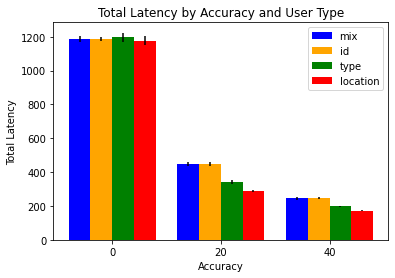

In [37]:
graphs = ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']

data = pd.read_csv('out.csv')

# Filter N equal to zero and mode not equal to 'cooperative'
filtered_data = data[(data['neighbor'] == 0) & (data['caching_mode'] != 'cooperative')]

# Define the accuracy levels as categorical values
accuracies = [0, 20, 40]

# Define the user types as categorical values
user_types = ['mix', 'id', 'type', 'location']
# Initialize empty lists for storing values and errors for each user type
values = {user_type: [] for user_type in user_types}
errors = {user_type: [] for user_type in user_types}

# Iterate over the accuracy levels and user types
for accuracy in accuracies:
    for user_type in user_types:
        # Filter data for the current accuracy and user type
        acc_user_data = filtered_data[(filtered_data['accuracy'] == accuracy) & (filtered_data['user_type'] == user_type)]
        # Get the total_latency_mean and total_latency_calculate_margin_error
        mean = acc_user_data['total_latency_mean'].values[0]
        error = acc_user_data['total_latency_calculate_margin_error'].values[0]
        # Append values and errors to the respective lists for the user type
        values[user_type].append(mean)
        errors[user_type].append(error)

# Set the figure size
# Define the accuracy levels as categorical values
accuracies_label = ['0', '20', '40']

# Set the x-axis positions
x_positions = range(len(accuracies_label))

# Set the width of each bar
bar_width = 0.2

# Set the colors for each user type
colors = ['blue', 'orange', 'green', 'red']

# Create a figure and axes
fig, ax = plt.subplots()
user_types = list(values.keys())
num_user_types = len(user_types)

# Plot the bar chart for each user type
for i, user_type in enumerate(values.keys()):
    x_positions_shifted = np.array(x_positions) + (i - (num_user_types - 1) / 2) * bar_width
    values_ = values[user_type]
    y_err = errors[user_type]
    ax.bar(x_positions_shifted, values_, width=bar_width, yerr=y_err, label=user_type, color=colors[i])

# Set the x-axis tick positions and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(accuracies_label)

# Set the x-axis and y-axis labels
ax.set_xlabel('Accuracy')
ax.set_ylabel('Total Latency')

# Set the title and legend
ax.set_title('Total Latency by Accuracy and User Type')
ax.legend()

# Show the plot
plt.show()

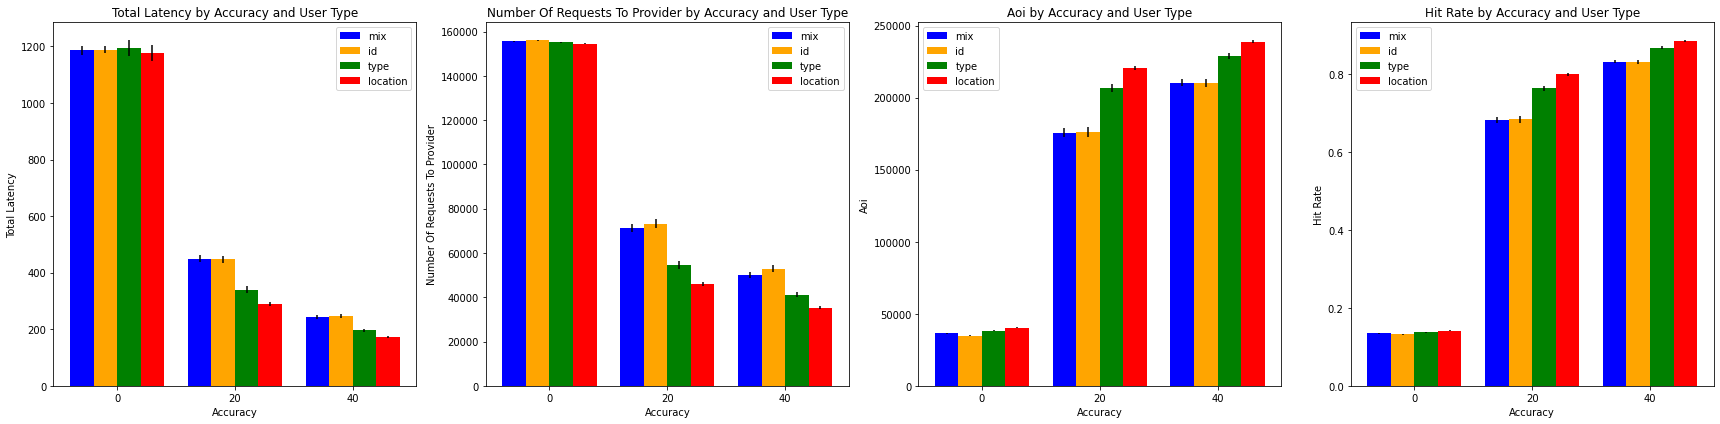

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('out.csv')

# Filter N equal to zero and mode not equal to 'cooperative'
filtered_data = data[(data['neighbor'] == 0) & (data['caching_mode'] != 'cooperative')]

# Define the accuracy levels as categorical values
accuracies = [0, 20, 40]

# Define the user types as categorical values
user_types = ['mix', 'id', 'type', 'location']

# Define the features to plot
features = ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']

# Set the figure size
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 6))

# Iterate over the features
for feature_index, feature in enumerate(features):
    # Initialize empty lists for storing values and errors for each user type
    values = {user_type: [] for user_type in user_types}
    errors = {user_type: [] for user_type in user_types}

    # Iterate over the accuracy levels and user types
    for accuracy in accuracies:
        for user_type in user_types:
            # Filter data for the current accuracy and user type
            acc_user_data = filtered_data[
                (filtered_data['accuracy'] == accuracy) & (filtered_data['user_type'] == user_type)
            ]
            # Get the mean and error for the current feature
            mean = acc_user_data[f'{feature}_mean'].values[0]
            error = acc_user_data[f'{feature}_calculate_margin_error'].values[0]
            # Append values and errors to the respective lists for the user type
            values[user_type].append(mean)
            errors[user_type].append(error)

    # Set the x-axis positions
    x_positions = np.arange(len(accuracies))
    # Set the width of each bar
    bar_width = 0.2
    # Set the colors for each user type
    colors = ['blue', 'orange', 'green', 'red']

    # Create a subplot for the current feature
    ax = axes[feature_index]

    # Plot the bar chart for each user type
    for i, user_type in enumerate(values.keys()):
        x_positions_shifted = x_positions + (i - (len(user_types) - 1) / 2) * bar_width
        values_ = values[user_type]
        y_err = errors[user_type]
        ax.bar(x_positions_shifted, values_, width=bar_width, yerr=y_err, label=user_type, color=colors[i])

    # Set the x-axis tick positions and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(accuracies)

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Accuracy')
    ax.set_ylabel(feature.replace('_', ' ').title())

    # Set the title and legend
    ax.set_title(f'{feature.replace("_", " ").title()} by Accuracy and User Type')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
